In [15]:
import os
import pandas as pd

# Set the base folder path
base_folder = r'models extra revers'

# Function to extract Degree and R2 from Excel files
def extract_metrics(file_path):
    df = pd.read_excel(file_path)
    if 'Degree' in df.columns and 'R2' in df.columns:
        return df[['Degree', 'R2']]
    else:
        return None

# Dictionary to store metrics by entity
metrics_dict = {}

# Iterate through subfolders
for root, dirs, files in os.walk(base_folder):
    for file in files:
        # Check if the file is an Excel file and contains metrics in the filename
        if file.endswith('.xlsx') and 'metrics' in file.lower():
            file_path = os.path.join(root, file)
            
            # Extract the entity from the filename
            entity = file.split('_')[1].split('.')[0]
            
            # Extract Degree and R2 from the Excel file
            metrics_df = extract_metrics(file_path)
            
            # If metrics are present, add them to the dictionary
            if metrics_df is not None:
                metrics_dict[entity] = metrics_df

# Create a DataFrame with the 'Degree' column and entity-specific R² columns
consolidated_metrics = pd.DataFrame()

# Add 'Degree' column from one of the DataFrames (assuming all have the same degrees)
for entity, df in metrics_dict.items():
    if consolidated_metrics.empty:
        consolidated_metrics['Degree'] = df['Degree']
    consolidated_metrics[entity] = df['R2']

# Save the consolidated metrics to a new Excel file
output_file = os.path.join(base_folder, 'consolidated_metrics_revers.xlsx')
consolidated_metrics.to_excel(output_file, index=False)

print(f"Consolidated metrics saved to {output_file}")


Consolidated metrics saved to models extra revers\consolidated_metrics_revers.xlsx


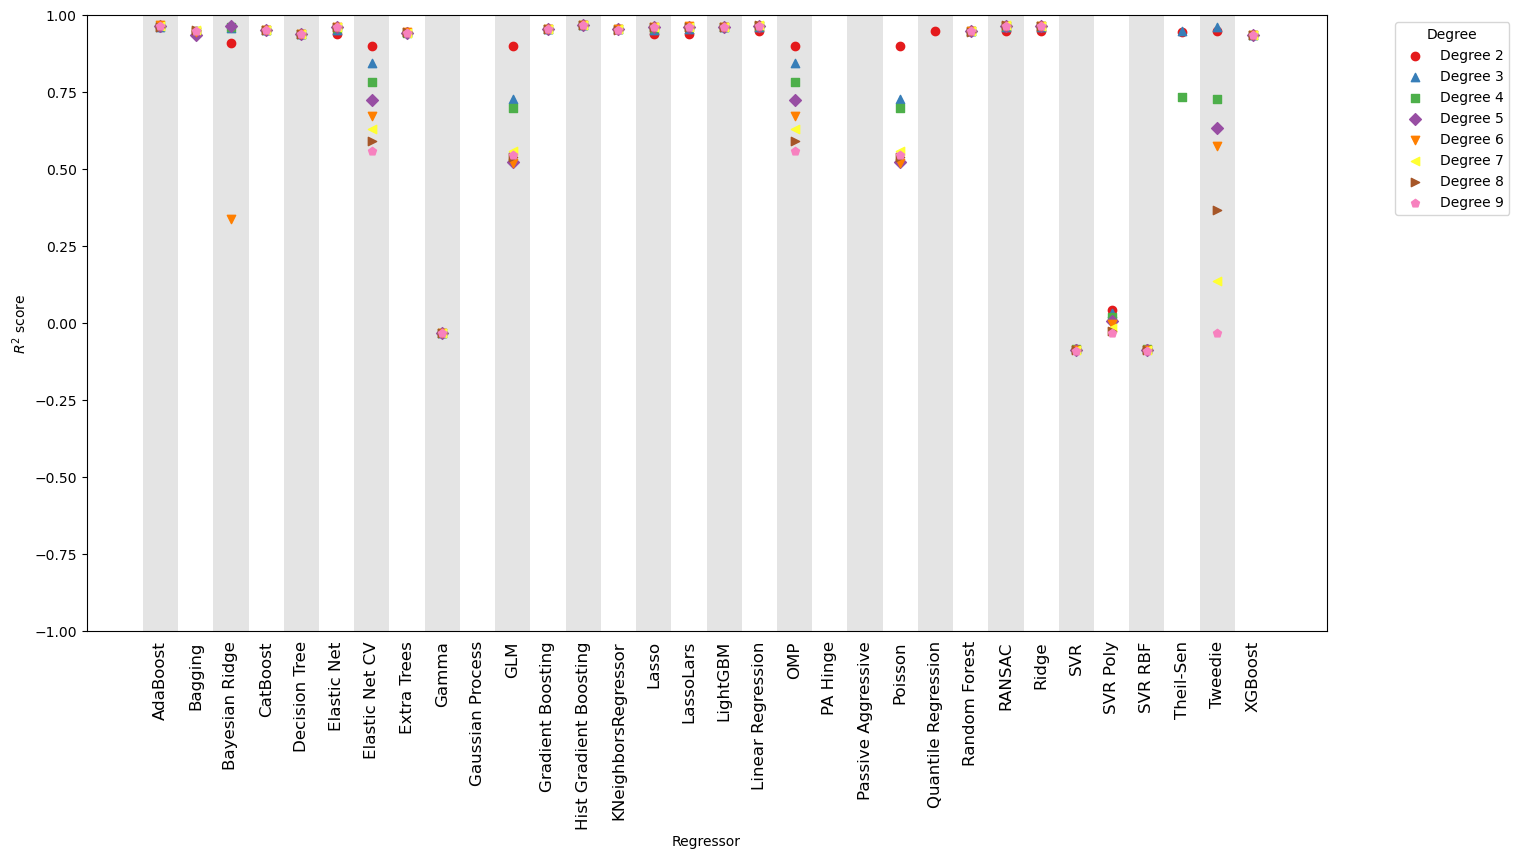

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle

result_df = pd.read_excel('consolidated_metrics_revers.xlsx')
# Create a DataFrame
df = result_df

plt.figure(figsize=(16, 8))
# Set ylim to -1..1
plt.ylim(-1, 1)

# Rotate index names 90 degrees
plt.xticks(rotation=90)

# Define markers for each Degree
markers = ['o', '^', 's', 'D', 'v', '<', '>', 'p']

# Create a color map for degrees
degree_color_map = {degree: color for degree, color in zip(df['Degree'], cycle(plt.cm.Set1.colors))}

# Keep track of plotted degrees
plotted_degrees = set()

# Plot the data
for idx, column in enumerate(df.columns[1:]):
    for degree, marker in zip(df['Degree'], markers):
        # Exclude invalid values before plotting
        valid_values = [df.at[degree - 2, column]]  # Wrap the value in a list
        valid_values = [v for v in valid_values if not pd.isna(v)]
        color = degree_color_map[degree]
        plt.scatter(column, valid_values, label=f"Degree {degree}", marker=marker, color=color)

        # Check if the degree has been plotted before
        if degree not in plotted_degrees:
            plotted_degrees.add(degree)

# Add labels and legend
plt.xlabel('Regressor')
plt.ylabel('$R^2$ score')

# Create a legend with unique degrees
legend_labels = [f"Degree {degree}" for degree in sorted(plotted_degrees)]
plt.legend(title='Degree', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

# Customize x-axis (index) labels
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.xticks(np.arange(len(df.columns[1:])), df.columns[1:], ha='center', fontsize=12)

# Add zebra-like transparent background to the entire figure
for i in range(len(df.columns[1:])):
    color = 'lightgray' if i % 2 == 0 else 'white'
    plt.axvspan(i - 0.5, i + 0.5, facecolor=color, alpha=0.6, zorder=-1)

plt.savefig('metrics_revers.pdf', bbox_inches='tight')
# Show the plot
plt.show()
